In [47]:
import os
import torch
import numpy as np
import diffusers
from diffusers import AutoencoderKL

In [48]:
import matplotlib.pyplot as plt

(80, 624)


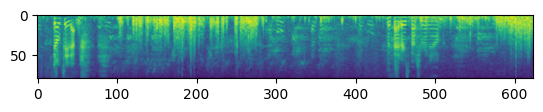

In [164]:
test_id = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/ac_train/mel/-0A1_JR5f34_16000_26000.npy"
test_mel = np.load(test_id)[:,:624]
print(test_mel.shape)
plt.imshow(test_mel)

In [ ]:
vae = AutoencoderKL.from_pretrained("/blob/v-yuancwang/AudioEditingModel/VAE_GAN/checkpoint-40000/vae")
vae.requires_grad_(False)

In [174]:
test_mel_tensor = np.expand_dims(np.expand_dims(test_mel, 0), 0)
test_mel_tensor = torch.Tensor(test_mel_tensor)
test_mel_tensor.shape

torch.Size([1, 1, 80, 624])

In [175]:
with torch.no_grad():
    posterior = vae.encode(test_mel_tensor).latent_dist
    z = posterior.sample()
    vae_output = vae.decode(z).sample

(80, 624)


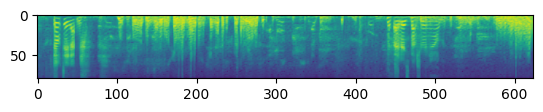

In [176]:
vae_res = vae_output[0][0].numpy()
print(vae_res.shape)
plt.imshow(vae_res)

In [177]:
abs_diff = abs(vae_res - test_mel)
print(abs_diff.max(), abs_diff.min(), abs_diff.mean())

2.8079102 5.722046e-06 0.33219305


In [178]:
from IPython.display import Audio
from shutil import copy

In [179]:
test_wav_id = test_id.replace("/mel/", "/wav/").replace(".npy", ".wav")
Audio(test_wav_id)

In [180]:
copy(test_id, '/home/v-yuancwang/AUDIT_v2/test_vae_mel/'+'test_0.npy')
np.save('/home/v-yuancwang/AUDIT_v2/test_vae_mel/'+'test_1.npy', vae_res)